In [19]:
#dependencies 
import numpy as np
import pandas as pd

In [20]:
#import cleaned data csv
all_wells = pd.read_csv('Cleaned_Data/well_cleaned.csv')
all_wells

,Unnamed: 0,WELL_BORE_CODE,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND,WELL_TYPE
0,15,NO 15/9-F-1 C,289.42,106.35,43.34,107.36,37.94,78.94,631.47,90439.09,0.00,production,OP
1,16,NO 15/9-F-1 C,270.24,107.64,47.17,99.19,60.76,70.63,1166.46,165720.39,0.00,production,OP
2,17,NO 15/9-F-1 C,262.84,107.87,47.73,94.60,63.05,66.05,1549.81,221707.31,0.00,production,OP
3,18,NO 15/9-F-1 C,255.53,107.97,48.53,89.99,64.55,61.41,1248.70,178063.52,0.00,production,OP
4,19,NO 15/9-F-1 C,247.20,108.05,49.84,84.78,65.72,56.15,1345.78,192602.19,0.00,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5938,8923,NO 15/9-F-15 D,194.98,106.52,31.58,15.81,49.02,1.26,144.01,23201.35,203.93,production,OP
5939,8924,NO 15/9-F-15 D,194.98,106.52,31.54,15.77,48.99,1.20,145.22,23068.07,202.93,production,OP
5940,8925,NO 15/9-F-15 D,194.32,106.52,31.52,15.70,50.10,1.28,142.74,23059.68,203.84,production,OP
5941,8926,NO 15/9-F-15 D,195.21,106.51,31.52,15.61,49.84,1.20,144.46,23090.47,202.76,production,OP


In [21]:
#read in data for analysis 
X1= all_wells[["AVG_CHOKE_SIZE_P","AVG_WHP_P","AVG_WHT_P","BORE_OIL_VOL","BORE_GAS_VOL", "BORE_WAT_VOL"]]
y1= all_wells["AVG_DOWNHOLE_PRESSURE"].values.reshape(-1, 1)
print(X1.shape)

(5943, 6)


In [22]:
#split into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
# # Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
# # Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [24]:
#create the model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

model = Sequential()
number_inputs = X_train.shape[1]
#first dense
model.add(Dense(units=50,
                activation='relu', input_dim=number_inputs))
#first dropout
model.add(Dropout(0.9758185183456943))
#second dense
model.add(Dense(500, kernel_initializer='normal',activation='relu'))
#second dropout
model.add(Dropout(0.288662535902546))
#last dense layer
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [25]:
#metrics
# CREDIT: https://github.com/keras-team/keras/issues/7947
# root mean squared error (rmse) for regression (only for Keras tensors)
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# mean squared error (mse) for regression  (only for Keras tensors)
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

# coefficient of determination (R^2) for regression  (only for Keras tensors)
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [26]:
#compile the model
from keras import losses

model.compile(loss="mean_absolute_error",
              optimizer="adam", metrics=[r_square, rmse])

In [27]:
model.fit(X_train_scaled,y_train_scaled,epochs=100, shuffle=True, validation_split=.15, verbose=2)

Train on 3788 samples, validate on 669 samples
Epoch 1/100
3788/3788 - 1s - loss: 0.8401 - r_square: -2.3062e-01 - rmse: 0.8401 - val_loss: 0.7571 - val_r_square: 0.0492 - val_rmse: 0.7571
Epoch 2/100
3788/3788 - 0s - loss: 0.8061 - r_square: -8.8059e-02 - rmse: 0.8061 - val_loss: 0.7582 - val_r_square: 0.0538 - val_rmse: 0.7582
Epoch 3/100
3788/3788 - 0s - loss: 0.7726 - r_square: -2.7934e-02 - rmse: 0.7726 - val_loss: 0.7543 - val_r_square: 0.0649 - val_rmse: 0.7543
Epoch 4/100
3788/3788 - 0s - loss: 0.7574 - r_square: 0.0093 - rmse: 0.7574 - val_loss: 0.7591 - val_r_square: 0.0528 - val_rmse: 0.7591
Epoch 5/100
3788/3788 - 0s - loss: 0.7466 - r_square: 0.0404 - rmse: 0.7466 - val_loss: 0.7602 - val_r_square: 0.0503 - val_rmse: 0.7602
Epoch 6/100
3788/3788 - 0s - loss: 0.7343 - r_square: 0.0628 - rmse: 0.7343 - val_loss: 0.7630 - val_r_square: 0.0414 - val_rmse: 0.7630
Epoch 7/100
3788/3788 - 0s - loss: 0.7388 - r_square: 0.0770 - rmse: 0.7388 - val_loss: 0.7661 - val_r_square: 0.032

Epoch 60/100
3788/3788 - 0s - loss: 0.6556 - r_square: 0.1857 - rmse: 0.6556 - val_loss: 0.7871 - val_r_square: -1.1185e-02 - val_rmse: 0.7871
Epoch 61/100
3788/3788 - 0s - loss: 0.6493 - r_square: 0.2045 - rmse: 0.6493 - val_loss: 0.7861 - val_r_square: -8.8760e-03 - val_rmse: 0.7861
Epoch 62/100
3788/3788 - 0s - loss: 0.6354 - r_square: 0.2161 - rmse: 0.6354 - val_loss: 0.7835 - val_r_square: -4.2916e-03 - val_rmse: 0.7835
Epoch 63/100
3788/3788 - 0s - loss: 0.6535 - r_square: 0.1930 - rmse: 0.6535 - val_loss: 0.7829 - val_r_square: -3.1697e-03 - val_rmse: 0.7829
Epoch 64/100
3788/3788 - 0s - loss: 0.6508 - r_square: 0.2008 - rmse: 0.6508 - val_loss: 0.7827 - val_r_square: -1.9273e-03 - val_rmse: 0.7827
Epoch 65/100
3788/3788 - 0s - loss: 0.6485 - r_square: 0.2163 - rmse: 0.6485 - val_loss: 0.7836 - val_r_square: -3.3086e-03 - val_rmse: 0.7836
Epoch 66/100
3788/3788 - 0s - loss: 0.6500 - r_square: 0.2191 - rmse: 0.6500 - val_loss: 0.7842 - val_r_square: -4.1777e-03 - val_rmse: 0.7842

In [28]:
print(model.evaluate(X_test_scaled, y_test_scaled, verbose=3))

[0.7985995914060046, -0.0024353622, 0.7985996]


In [29]:
predictions_test = model.predict(X_test_scaled)
predictions_train = model.predict(X_train_scaled)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
mse_train = mean_squared_error(y_train_scaled, predictions_train)
r2_train = r2_score(y_train_scaled, predictions_train)

mse_test = mean_squared_error(y_test_scaled, predictions_test)
r2_test = r2_score(y_test_scaled, predictions_test)

print(f"Mean Squared Error (MSE) Train Data: {mse_train}")
print(f"R-squared (R2) Train Data: {r2_train}")
print("-----------------------------------")
print(f"Mean Squared Error (MSE) Test Data: {mse_test}")
print(f"R-squared (R2) Test Data: {r2_test}")

Mean Squared Error (MSE) Train Data: 0.9629397223093885
R-squared (R2) Train Data: 0.03706027769061171
-----------------------------------
Mean Squared Error (MSE) Test Data: 0.9500417478021046
R-squared (R2) Test Data: 0.03405271336186211


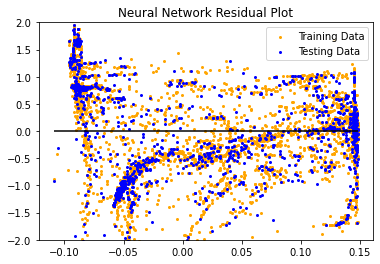

In [33]:
# Plot Residuals
import matplotlib.pyplot as plt

plt.title('Neural Network Residual Plot')
plt.scatter(predictions_train, predictions_train - y_train_scaled, c= "orange",label="Training Data", s=4)
plt.scatter(predictions_test, predictions_test - y_test_scaled, c= "blue",label="Testing Data",s=4)
plt.ylim(-2,2)
plt.hlines(y=0, xmin=predictions_test.min(), xmax=predictions_test.max())
plt.legend()

plt.savefig('neuralnetworkresidual.png')
plt.show()